# CISC3024 Lab 7

## Create Synthetic Samples
Create a 3-class toy dataset, each sampled from a 2D Gaussian distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, 
                             precision_score, recall_score,
                             f1_score, roc_auc_score,
                             roc_curve, precision_recall_curve,
                             average_precision_score)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay

# Random Seed for reproductability
np.random.seed(0)

# Hyper Parameters
n_train = 50
n_test = 30
n_classes = 3

# Means for gauss dists of each class
mean_0 = [0, 0]
mean_1 = [1, 1] # Close to class 0
mean_2 = [3, 3] # Far from class 0 and 1

cov = [[1, 0], [0, 1]] # Common, Identity covariate matrix (Euclidean Dist)

# Generate Training Data (Pseudo)
X_train_0 = np.random.multivariate_normal(mean_0, cov, n_train)
X_train_1 = np.random.multivariate_normal(mean_1, cov, n_train)
X_train_2 = np.random.multivariate_normal(mean_2, cov, n_train)

y_train_0 = np.zeros(n_train)
y_train_1 = np.ones(n_train)
y_train_2 = np.full(n_train, 2)

X_train = np.vstack([X_train_0, X_train_1, X_train_2])
y_train = np.concatenate([y_train_0, y_train_1, y_train_2])

# Generate Testing Data
X_test_0 = np.random.multivariate_normal(mean_0, cov, n_test)
X_test_1 = np.random.multivariate_normal(mean_1, cov, n_test)
X_test_2 = np.random.multivariate_normal(mean_2, cov, n_test) 

y_test_0 = np.zeros(n_test)
y_test_1 = np.ones(n_test)
y_test_2 = np.full(n_test, 2)

X_test = np.vstack([X_test_0, X_test_1, X_test_2])
y_test = np.concatenate([y_test_0, y_test_1, y_test_2])

## Train a Logistic Regression Model

In [2]:
# Initialize classifier
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train classifier
clf.fit(X_train, y_train)

# Predict 
y_pred = clf.predict(X_test)

# Predict Probabilities
y_score = clf.predict_proba(X_test)

print(f"y_pred:{y_pred}\n y_score:{y_score}")

y_pred:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 2. 0. 1. 0. 1. 0. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2.]
 y_score:[[6.56463367e-01 3.42792815e-01 7.43817608e-04]
 [8.57721068e-01 1.42226907e-01 5.20247613e-05]
 [7.06557255e-01 2.92891650e-01 5.51094241e-04]
 [9.71442500e-01 2.85570103e-02 4.90063477e-07]
 [6.38040431e-01 3.60811431e-01 1.14813758e-03]
 [5.34055317e-01 4.63215450e-01 2.72923353e-03]
 [9.40189910e-01 5.98062353e-02 3.85488552e-06]
 [7.86097009e-01 2.13729344e-01 1.73647180e-04]
 [7.94816361e-01 2.05024520e-01 1.59118901e-04]
 [7.68717293e-01 2.31051397e-01 2.31309548e-04]
 [9.21689693e-01 7.83016721e-02 8.63503545e-06]
 [8.37812416e-01 1.62106878e-01 8.07061721e-05]
 [9.15698064e-01 8.42918619e-02 1.00739146e-05]
 [2.70594152e-01 7.03269844e-01 2.61360039e-02]
 [6.86400564e-01 3.13016484e-01 5.829

## Accuracy, Precision, Recall and $F_1$ score

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average=None, labels=[0,1,2])
recall = recall_score(y_test, y_pred, average=None, labels=[0,1,2])
f1 = f1_score(y_test, y_pred, average=None, labels=[0,1,2])

for i in range(n_classes):
    print(f"Class {i}: Prec:{precision[i]:.2f}, Rec:{recall[i]:.2f}, F1:{f1[i]:.2f}")

Accuracy: 0.79
Class 0: Prec:0.72, Rec:0.97, F1:0.83
Class 1: Prec:0.76, Rec:0.53, F1:0.63
Class 2: Prec:0.90, Rec:0.87, F1:0.88


## Plot Confusion Matrix

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matirx:\n{cm}")

Confusion Matirx:
[[29  1  0]
 [11 16  3]
 [ 0  4 26]]


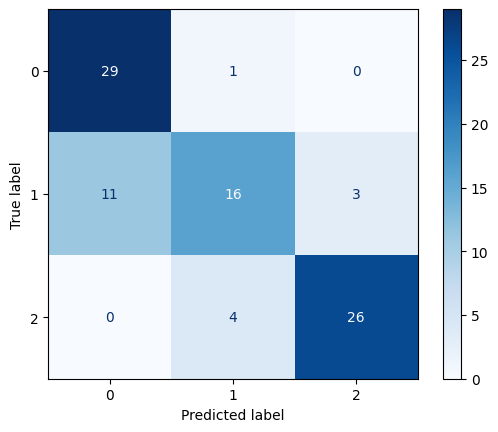

In [21]:
# Plot Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Plot ROC curve and compute ROC AUC
To compute ROC (Receiver Operating Characteristic), we need to first specify positive class using `label_binarize`.

In [25]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_test_bin[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [27]:
# Compute ROC AUC for each class
roc_auc = dict()
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_bin[:,i], y_score[:, i])
    print(f"Class {i}: ROC AUC: {roc_auc[i]:.2f}")

Class 0: ROC AUC: 0.95
Class 1: ROC AUC: 0.86
Class 2: ROC AUC: 0.98


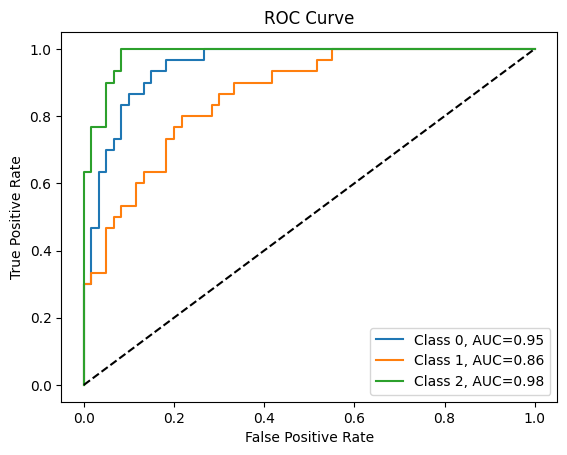

In [28]:
# Plot ROC Curves
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}, AUC={roc_auc[i]:.2f}")

plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## Plot Precision-Recall Curve

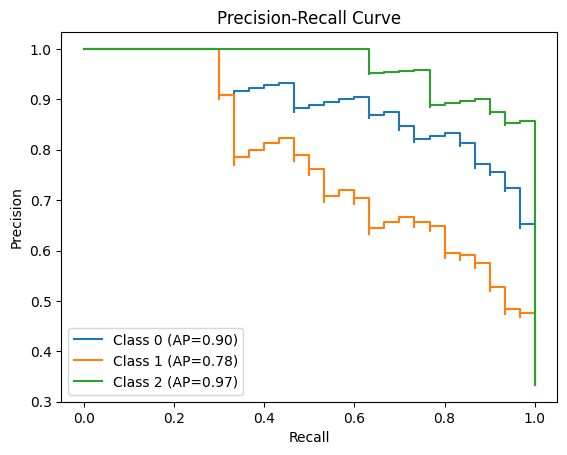

In [32]:
for i in range(n_classes):
    precision_i, recall_i, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.step(recall_i, precision_i, where="post", label=f"Class {i} (AP={average_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

## Plot Decision Boundary

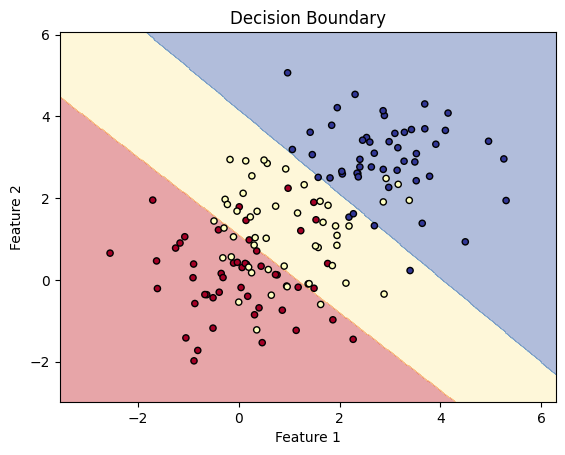

In [34]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k',
cmap=plt.cm.RdYlBu)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()